In [2]:
import pandas
from numpy import *
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.gridspec as gridspec

In [34]:
#read in data
dat = pandas.read_csv('ks-projects-201801.csv')

#add columns to data
deltatime = array(dat['deadline'], dtype=datetime64)-array(dat['launched'],dtype=datetime64)
dat = dat.assign(deltat=array(array(deltatime,dtype='timedelta64[D]'),dtype=float))
dat = dat.assign(pledged_per_backer=dat['usd pledged']/dat['backers'])
dat = dat.assign(pledged_to_goal=dat['pledged']/dat['goal'])
namelen = zeros(len(dat))
for i in arange(0, len(dat)):
    try:
        namelen[i] = len(dat['name'].values[i])
    except TypeError:
        continue
dat = dat.assign(namelength=namelen)
dat = dat.assign(launchyear=pandas.DatetimeIndex(dat['launched']).year)

nan
nan
nan
nan


In [48]:
#select useful data from dat
with pandas.option_context('mode.use_inf_as_null', True):
    datdropna = dat.dropna()
    usedat = datdropna[((datdropna.state == 'successful')|(datdropna.state == 'failed'))&(datdropna.backers>0)&(datdropna.usd_goal_real>10)] #only consider successful or failed projects


In [93]:
#defining functions
def countfrac(df, col1name, col1, col2name, col2):
    out = zeros((len(col1), len(col2))); outfrac = zeros((len(col1), len(col2)))
    for i in arange(0, len(col1)):
        for j in arange(0, len(col2)):
            out[i,j] = len(where((df[col1name]==col1[i])*(df[col2name]==col2[j]))[0])
            outfrac[i,j] = out[i,j]/len(where(df[col1name]==col1[i])[0])
    return out, outfrac

def barplots(arr, lab1, lab2, colors, xlims=[0,1], xlabel='Fraction'):
    ypos = arange(0, len(arr))
    levbefore = zeros(len(arr))
    for j in arange(0, shape(arr)[1]):
        plt.barh(ypos, arr[:,j], color=colors[j], left=levbefore, label=lab2[j])
        levbefore= levbefore+arr[:,j]
    #plt.legend()
    plt.yticks(ypos, (lab1))
    plt.xlim(xlims[0], xlims[1])
    plt.xlabel(xlabel)
    return

[ 0.01931014  0.15891106  0.41198743  0.66832002  0.73202454  0.97264397
  1.          0.82897278  0.7369278 ]


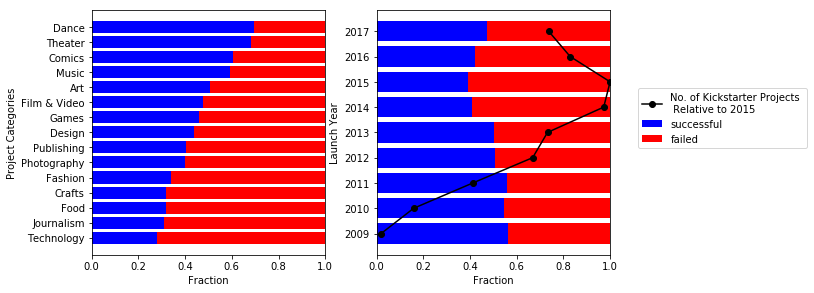

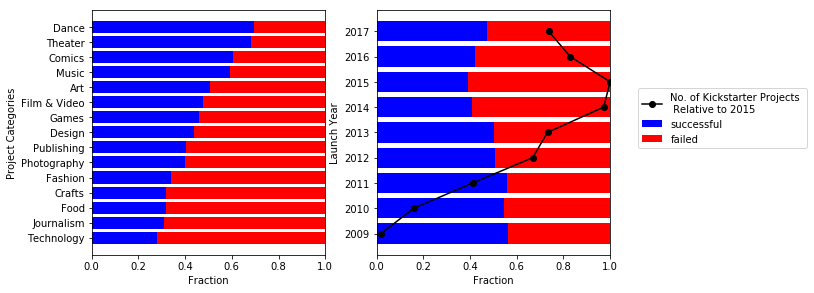

In [101]:
#consider only successful and failed projects
states = ['successful', 'failed']#unique(usedat['state'], return_counts=True)
maincats = unique(usedat['main_category'])#, return_counts=True)
colors=['blue', 'red']
launchyears, launchyears_counts= unique(usedat['launchyear'], return_counts=True)

#sort categories in plot by success function
maincats_success_frac = zeros(len(maincats))
for i in arange(0, len(maincats)):
    maincats_success_frac[i] = float(len(usedat[(usedat.main_category == maincats[i])*(usedat.state == 'successful')]))/float(len(usedat[(usedat.main_category == maincats[i])]))
maincats_sorted_ind = argsort(maincats_success_frac)
maincats_sorted = maincats[argsort(maincats_success_frac)]

#calculate counts for successful and failed projects per category
maincats_states, maincats_states_frac = countfrac(usedat, 'main_category', maincats_sorted, 'state', states)
launchyears_states, launchyears_states_frac = countfrac(usedat, 'launchyear', launchyears, 'state', states)
#calculate fraction of projects per launch year relative to max number
launchyears_counts_frac = launchyears_counts/float(max(launchyears_counts))

#make Fig 1a
fig=plt.figure(figsize=(9,4))
gs = gridspec.GridSpec(1,2, wspace=0.22, hspace=.02, left=0.15, right=0.95, top=0.95, bottom=0.1)
plt.subplot(gs[0])
barplots(maincats_states_frac, maincats_sorted, states, colors)
plt.ylabel('Project Categories')
#make Fig 1b
plt.subplot(gs[1])
barplots(launchyears_states_frac, launchyears, states, colors)
plt.plot(launchyears_counts_frac, arange(0,len(launchyears)), 'ko-', label='No. of Kickstarter Projects \n Relative to 2015')
plt.ylabel('Launch Year')
plt.legend(bbox_to_anchor=(1.1, .7))
plt.savefig('Fig1.pdf', bbox_inches='tight')


In [53]:
#separate usedat into successful and failed projects
sucdat = usedat[usedat.state == 'successful']
faildat = usedat[usedat.state=='failed']


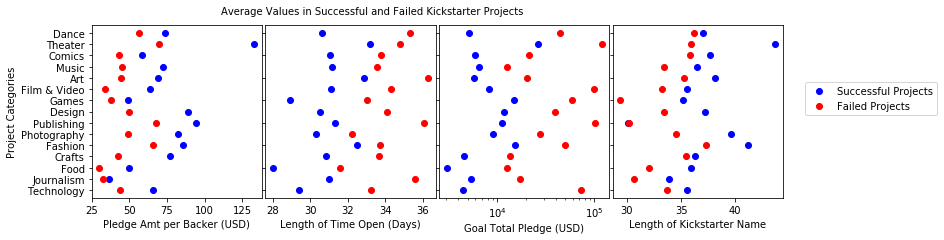

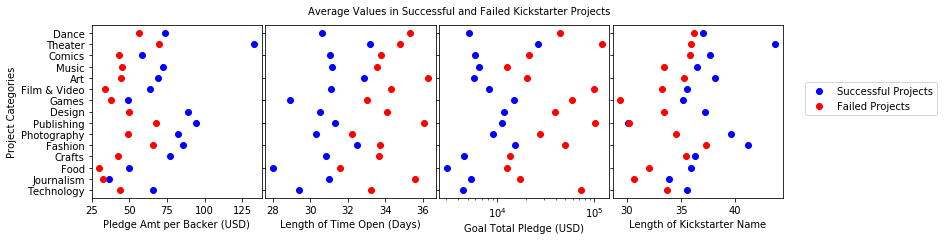

In [105]:

#plot average value in successful and failed projects
ypos = arange(0, len(maincats_sorted))
fig=plt.figure(figsize=(12,3))
gs = gridspec.GridSpec(1,4, wspace=0.02, hspace=.02, left=0.15, right=0.95, top=0.9, bottom=0.1)
testcol = ['pledged_per_backer', 'deltat', 'usd_goal_real', 'namelength']
testlab = ['Pledge Amt per Backer (USD)', 'Length of Time Open (Days)', 'Goal Total Pledge (USD)', 'Length of Kickstarter Name']
for i in arange(0, len(testcol)):
    plt.subplot(gs[i])
    plt.plot(sucdat[testcol[i]].groupby(sucdat['main_category']).mean().values, ypos, 'bo', label='Successful Projects')
    plt.plot(faildat[testcol[i]].groupby(faildat['main_category']).mean().values, ypos, 'ro', label='Failed Projects')
    plt.xlabel(testlab[i])
    if i==0:
        plt.yticks(ypos, (maincats_sorted))
        plt.ylabel('Project Categories')
        
    else:
        plt.yticks(visible=False)
    if i==2:
        plt.xscale('log')
plt.legend(bbox_to_anchor=(1.1, .7))
fig.text( .4,.95, 'Average Values in Successful and Failed Kickstarter Projects')
plt.savefig('Fig2.pdf', bbox_inches='tight')
plt.show()
